#  Simple Linear Regression Model: Sales ~ Advertising
As part of an assignment for an Econometrics course on Coursera, here is a simple regression model that is based on a dataset that contains twenty weekly observations on sales and advertising of a department store.

The dependent variable or the Y variable is sales, while the independent variable or the X variable is the advertising spend.

In [151]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [152]:
#loading the data in a pandas dataframe
file_name = "/Users/kaleembukhari/Documents/DataAnalytics/Coursera_Econometrics/SimpleRegression_dataset1.xls"
dataset = pd.read_excel(file_name)

In [153]:
#viewing the top 5 rows of the dataset
dataset.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


**(a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you expect to find if you would fit a regression line to these data?**

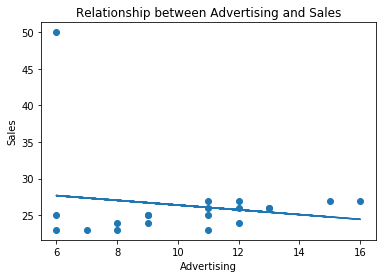

In [154]:
#let's create the arrays for both X and Y variables
x = np.array(dataset['Advertising'])
y = np.array(dataset['Sales'])

#to build a scatter plot with the fitted regression line, we need a slope and an intercept
slope, intercept = np.polyfit(x,y,1)
y_hat = slope * x + intercept

#let's make a scatterplot along with the regression line using matplotlib
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_hat)
plt.title("Relationship between Advertising and Sales")
plt.ylabel("Sales")
plt.xlabel("Advertising")
plt.show()

The visualization above shows a negative relationship between advertising and sales. This means as the advertising spend increases, sales decrease.

**(b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. 
Also compute the standard error and t-value of b. Is b significantly different from 0?**

Here, I use manual computations to find the value for a and b, intercept and slope respectively.

$$ b = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ a = \bar{y} - b\bar{x} $$

Where $\bar{x}$ is the mean x value, and $\bar{y}$ is the mean y value.

In [155]:
#let's do the computation now
def slope_intercept(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    numerator = np.sum((x - x_bar)*(y - y_bar))
    denominator = np.sum((x - x_bar)**2)
    b = numerator / denominator
    a = y_bar - (b * x_bar)
    return a,b

In [156]:
a = slope_intercept(x,y)[0]
b = slope_intercept(x,y)[1]
print ("Value for intercept or a = ",a)
print ("Value for slope or b = ", b)

Value for intercept or a =  29.6268933539
Value for slope or b =  -0.32457496136


The regression equation is:

$$Sales = 29.62 - 0.324*Advertising$$

The equation for residuals is:

$$Residuals = y_i - a - bx_i$$

In [157]:
#let's get the predicted y values based on the slope and the intercept
def predicted(slope,x,intercept):
    y_pred = (a) + (b*x)
    return y_pred

y_predicted = predicted(b,x,a)

In [158]:
#To get the residuals, we need the following calculations
def residuals(b,a,x,y):
    bx = b * x
    residuals = y - a - bx
    return residuals

residual_values = residuals(b,a,x,y)

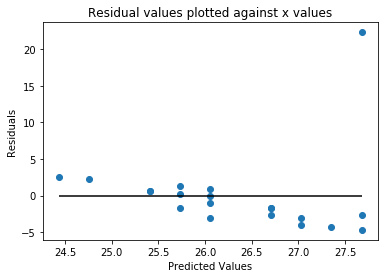

In [159]:
def plot_residuals(res,predicted):
    fig, ax = plt.subplots()
    ax.scatter(y_predicted, res)
    ax.hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    plt.title("Residual values plotted against x values")
    plt.ylabel("Residuals")
    plt.xlabel("Predicted Values")
    return plt.show()

plot_residuals(residual_values,y_predicted)

The graphs above plots the residuals against the predicted values. Based on the graphs, we can see that the following Gauss Markov assumptions are violated.

1. Errors are random, such that:

$$ E(\epsilon_i) = 0$$

2. The errors are Homoskedastic, such that variance is the same regardless of the x values:

$$ E(\epsilon_i^2) = \sigma^2$$

3. The errors follow a normal distribution with mean 0 and standard deviation 1, such that :

$$ \epsilon \sim NID(\mu,\sigma) $$

**In order to find the standard error, t-value for slope, and statistical significance let's use the OLS linear regression model from the statsmodel library.**

Standard error is given as:
$$ SE = \frac{\sigma}{\sqrt n}$$

$$ \sigma = standard\space deviation$$
$$ n = sample \space size $$

In [160]:
#Using the library for OLS model
x1 = sm.add_constant(x)
reg_model = sm.OLS(y,x1).fit()
print("Value for R-Squared =",reg_model.rsquared)
print("Standard Error for slope =", reg_model.bse[1])
print("p Value for slope =", reg_model.pvalues[1])
print("t Value for slope =", reg_model.tvalues[1])

Value for R-Squared = 0.0270393295325
Standard Error for slope = 0.458910975803
p Value for slope = 0.488454014209
t Value for slope = -0.707272169275


A value of R-squared as low as 0.027 means that advertising doesn't explain the variability in sales. It only explains 2.7% of the variability in sales, and is not a good predictor.

Moreover, since the value p-value is > 0.05, b is not significantly different than 0. This means that advertising is an insignificant variable in explaining the variability in sales. Any variability that is shows may be due to chance.

**(c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?**

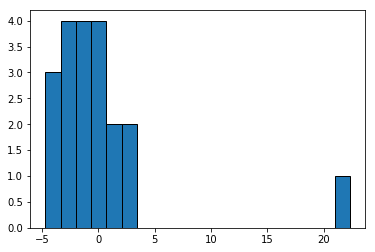

In [171]:
#plotting a histogram for the residuals

fig, ax = plt.subplots()
ax.hist(residual_values, bins=20, ec='black')
plt.show()

Almost all the residual values have lie between -5 and +5. However, there is one outlier that makes the distrbituion right skewed. This residual looks like a result of an outlier is sales value of 50.